# Research Project Daily

# Import Libraries

In [2]:
#Import Libraries

import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import talib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from sklearn import linear_model
from sklearn.metrics import accuracy_score,log_loss,precision_score,roc_auc_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split


ModuleNotFoundError: No module named 'sklearn.cross_validation'

# Import and Downlad Data

In [2]:
#ImportData

#path = "C:/Users/User/Desktop/Research Project/Top40_Investing"
#os.chdir(path)

df = pd.read_csv("MTN.csv", index_col=0, parse_dates=True)
df = df[['Price', 'Open', 'High', 'Low', 'Volume']]

df1 = df.copy()

stock_high = df['High']
stock_low = df['Low']
stock_open = df['Open']
stock_close = df['Price']
stock_volume = df['Volume']


# Oscillators and Trend Following Indicators

# 1. MACD and MACD HISTOGRAM

In [3]:
#Compute MACD and MACD Histogram
macd, macdsignal, macdhist = talib.MACD(stock_close, fastperiod=26, slowperiod=12, signalperiod=9)

dict = {'MACD': macd, 'MSIG': macdsignal}
macdata = []
macdata = pd.DataFrame(data=dict)
macdata.dropna(inplace=True)

macdata['MACD_Signal1'] = macdata.apply(lambda x : 1 if x['MACD'] > x['MSIG'] else 0, axis = 1)

n_days = len(macdata['MACD'])
Signal = macdata['MACD_Signal1']
psy = []

for d in range(0, n_days):
    
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
macdata['MACD_Signal'] = psy

del macdata['MACD_Signal1']

dict = {'MHIST': macdhist, 'PrevMHIST': macdhist.shift(1)}
machdata = []
machdata = pd.DataFrame(data=dict)
machdata.dropna(inplace=True)

machdata['MHIST_Signal1'] = machdata.apply(lambda x : 1 if x['MHIST'] > x['PrevMHIST'] else 0, axis = 1)

n_days = len(machdata['MHIST'])
Signal = machdata['MHIST_Signal1']
psy = []

for d in range(0, n_days):
    
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
machdata['MHIST_Signal'] = psy

del machdata['MHIST_Signal1']


# 2. Average Directional Index (ADX)

In [4]:
#Compute Average Directional Index (ADX)
adx = talib.ADX(stock_high, stock_low, stock_close, timeperiod=14)

dict = {'Close': stock_close, 'ADX': adx }

adxdata = []
adxdata = pd.DataFrame(data=dict)
adxdata.dropna(inplace=True)

adxdata['adx1'] = adxdata.apply(lambda x : 1 if x['ADX'] > 25 else 0, axis=1)
adxdata['adx2'] = adxdata.apply(lambda x : -1 if x['ADX'] < 20 else 0, axis=1)

adxdata['Signw'] = adxdata.apply(lambda x : x['adx1'] + x['adx2'] , axis=1)

n_days = len(adxdata['ADX'])
Signal = adxdata['Signw']
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
        
adxdata['Trend'] = psy

del adxdata['Signw']
del adxdata['adx1']
del adxdata['adx2']


# 3. Relative Strength Index (RSI)

In [5]:
#Compute Relatie Strength Index (RSI)
rsi = talib.RSI(stock_close, timeperiod=14)

dict = {'Close': stock_close, 'RSI': rsi }

rsidata = []
rsidata = pd.DataFrame(data=dict)
rsidata.dropna(inplace=True)

rsidata['rsi1'] = rsidata.apply(lambda x : 1 if x['RSI'] < 30 else 0, axis=1)
rsidata['rsi2'] = rsidata.apply(lambda x : -1 if x['RSI'] > 70 else 0, axis=1)
rsidata['Sign1'] = rsidata.apply(lambda x : x['rsi1'] + x['rsi2'], axis=1)

n_days = len(rsidata['RSI'])
Signal = rsidata['Sign1']
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
    
    elif Signal[d] == 0:
        psycology = 0
        psy.append(psycology)
        
rsidata['Psycology'] = psy

del rsidata['Sign1']
del rsidata['rsi1']
del rsidata['rsi2']


# Volatility Indicators

# 4. Bollinger Bands

In [6]:
#Compute Bollinger Bands
upper, middle, lower = talib.BBANDS(stock_close, timeperiod=26)

dict = {'Close': stock_close, 'Middle': middle, 'Upper': upper, 'Lower': lower }

bbdata = []
bbdata = pd.DataFrame(data=dict)
bbdata.dropna(inplace=True)

#Generate the Long and Short Signals
n_days = len(bbdata['Middle'])
cash = 1
stock = 0

position = []

spread = stock_close
ma = middle
upper_band = upper
lower_band = lower

for d in range(0, n_days):
    
    # Long if spread < lower band & if not bought yet
    if spread[d] < lower_band[d] and cash == 1:
        signal = 1
        cash = 0
        stock = 1
        position.append(signal)
        
        
    # Take Profit if spread > moving average & if already bought
    elif spread[d] > ma[d] and stock == 1:
        signal = 3
        cash = 1
        stock = 0
        position.append(signal)
        
    # Short if spread > upper band and no current position
    elif spread[d] > upper_band[d] and cash == 1:
        signal = -1
        cash = 0
        stock = -1
        position.append(signal)
        

    # Take Profit if spread < moving average & if already short
    elif spread[d] < ma[d] and stock == -1:
        signal = 3
        cash = 1
        stock = 0
        position.append(signal)
    
    else:
        signal = 0
        position.append(signal)
        
bbdata['Position1'] = position
bbdata['Position1'] = bbdata['Position1'].replace(to_replace=0, method= 'ffill')
bbdata['Position1'] = bbdata['Position1'].replace(3,0)
bbdata['Position'] = bbdata['Position1']

del bbdata['Position1']

t_days = len(bbdata['Middle'])
Signal = bbdata['Position']
pos = []

for d in range(0, t_days):
    if Signal[d] == 0:
        strategy = 0
        pos.append(strategy)
    
    elif Signal[d] == 1:
        strategy = 1
        pos.append(strategy)
    
    elif Signal[d] == -1:
        strategy = 0
        pos.append(strategy)

bbdata['Strategy'] = pos


# Volume Indicators

# 5. Force Index

In [7]:
#Force Index Function
def ForceIndex(Volume, Close):
    dict = {'Volume': Volume, 'Close': Close}
    df = pd.DataFrame(data=dict)
    df.dropna(inplace=True)
    
    FI = df['Volume']*(df['Close'] - df['Close'].shift(1))
    
    return FI

#Compute Force Index
fi = ForceIndex(stock_volume,stock_close)

efi = talib.EMA(fi, timeperiod=13)

dict = {'Close': stock_close, 'EFI': efi }

efidata = []
efidata = pd.DataFrame(data=dict)
efidata.dropna(inplace=True)


efidata['efi_sign'] = efidata.apply(lambda x : 1 if x['EFI'] > 0 else -1, axis=1)

n_days = len(efidata['EFI'])
Signal = efidata['efi_sign']
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
      
efidata['Psycology'] = psy

del efidata['efi_sign']


# Classify Next Weeks Stock Move

In [8]:
#Compute Weekly Stock Move and Iddentify if > 0.003
stock_move = stock_close.shift(-1)

dict = {'Close': stock_close, 'Move': stock_move}

sdmdata = []
sdmdata = pd.DataFrame(data=dict)
sdmdata.dropna(inplace=True)

sdmdata['sign'] = sdmdata.apply(lambda x : 1 if np.log(x['Move']/x['Close']) > 0 else -1, axis=1)


n_days = len(sdmdata['Move'])
Signal = sdmdata['sign']
psy = []

for d in range(0, n_days):
    if Signal[d] == 1:
        psycology = 1
        psy.append(psycology)
    
    elif Signal[d] == -1:
        psycology = 0
        psy.append(psycology)
    
      
sdmdata['Next Week Move'] = psy

del sdmdata['sign']


# Consolidate Technical Indicators and Next Day's Stock Move

In [9]:
#Data
Close = pd.DataFrame({'Close': stock_close})
NWM = pd.DataFrame({'Next Week Move': sdmdata['Next Week Move']})
MACD = pd.DataFrame({'MACD': macdata['MACD_Signal']})
ADX = pd.DataFrame({'ADX': adxdata['Trend']})
MHIST = pd.DataFrame({'MHIST': machdata['MHIST_Signal']})
RSI = pd.DataFrame({'RSI': rsidata['Psycology']})
BB = pd.DataFrame({'BB': bbdata['Strategy']})
FI = pd.DataFrame({'FI': efidata['Psycology']})

#Merge
merge1 = pd.merge(Close, NWM, left_index=True, right_index=True, how='outer')
merge2 = pd.merge(merge1, MACD, left_index=True, right_index=True, how='outer')
merge3 = pd.merge(merge2, ADX, left_index=True, right_index=True, how='outer')
merge4 = pd.merge(merge3, MHIST, left_index=True, right_index=True, how='outer')
merge5 = pd.merge(merge4, RSI, left_index=True, right_index=True, how='outer')
merge6 = pd.merge(merge5, BB, left_index=True, right_index=True, how='outer')
df_daily = pd.merge(merge6, FI, left_index=True, right_index=True, how='outer')

df_daily.dropna(inplace=True)

#df_daily.to_csv('df_daily.csv')


# Build Random Forest Algorithm and Evalate

In [10]:
#Split Data
x = df_daily[['MACD', 'ADX', 'MHIST', 'RSI', 'BB', 'FI']]
y = df_daily['Next Week Move']
z = df_daily['Close']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1124, test_size=0.25)

#Generate Random Forest Algorithm
model = RandomForestClassifier(n_estimators=100,max_depth=10,max_features=None,max_leaf_nodes=None,
                               min_samples_leaf=1, min_samples_split=2,oob_score=True,random_state=1124)
model.fit(x_train,y_train)
#Evaluate Model
training_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)
dif = training_score - test_score

print('Model Training Score is:', training_score)
print('Model Test Score is:', test_score)
print('Model Difference is:', dif)

pred_prob_test=model.predict_proba(x_test) 
pred_test=model.predict(x_test) 

pred_train=model.predict(x_train)
pred_prob_train=model.predict_proba(x_train)

print('Model OOB Score is:', model.oob_score_)
AUC_train = roc_auc_score(y_train,model.predict(x_train))
AUC_test = roc_auc_score(y_test,model.predict(x_test))
dift = AUC_train - AUC_test
print('Model AUC Traing Score is:', AUC_train)
print('Model AUC Test Score is:', AUC_test)
print('AUC Difference is:', dift)

#confusion_matrix(y_train,pred_train)
#confusion_matrix(y_test,pred_test)


Model Training Score is: 0.5636166756903086
Model Test Score is: 0.5584415584415584
Model Difference is: 0.005175117248750194
Model OOB Score is: 0.5381700054141851
Model AUC Traing Score is: 0.5633496551546234
Model AUC Test Score is: 0.5595479082321188
AUC Difference is: 0.0038017469225046785


# Strategy Analysis: Training Period

In [11]:
#Prepare
T1data = df_daily[:1844]
del T1data ['Next Week Move']

inx1 = T1data[['MACD', 'ADX', 'MHIST', 'RSI', 'BB', 'FI']]
inclose1 = T1data['Close']

predictions1 =model.predict(inx1)
T1data['Predict'] = predictions1

R1data = T1data[['Close', 'Predict', 'MACD', 'RSI', 'BB']]
R1data['NextClose'] = R1data['Close'].shift(-1)
R1data.dropna(inplace=True)

#Strategy Return
R1data['Strategy Return'] = R1data.apply(lambda x : np.log(x['NextClose']/x['Close']) if 
                                         x['Predict'] == 1 else 0, axis=1)
Total_Return1 = R1data['Strategy Return'].sum()
Cum_Return1 = R1data['Strategy Return'].cumsum()
print('The Total Return for the Strategy is:', Total_Return1)

#MACD
R1data['MACD Return'] = R1data.apply(lambda x : np.log(x['NextClose']/x['Close']) if x['MACD'] == 1 else 0.001, axis=1)
Total_MACD1 = R1data['MACD Return'].sum()
Cum_MACD1 = R1data['MACD Return'].cumsum()
print('The Total Return for the MACD Strategy is:', Total_MACD1)

#RSI
R1data['RSI Return'] = R1data.apply(lambda x : np.log(x['NextClose']/x['Close']) if x['RSI'] == 1 else 0.001, axis=1)
Total_RSI1 = R1data['RSI Return'].sum()
Cum_RSI1 = R1data['RSI Return'].cumsum()
print('The Total Return for the RSI Strategy is:', Total_RSI1)

#BB
R1data['BB Return'] = R1data.apply(lambda x : np.log(x['NextClose']/x['Close']) if x['BB'] == 1 else 0.001, axis=1)
Total_BB1 = R1data['BB Return'].sum()
Cum_BB1 = R1data['BB Return'].cumsum()
print('The Total Return for the BB Strategy is:', Total_BB1)

#Buy and Hold Return
R1data['Buy & Hold Returns'] = np.log(R1data['NextClose'] /R1data['Close'])
BH_Return1 = R1data['Buy & Hold Returns'].sum()
BH_Cum_Return1 = R1data['Buy & Hold Returns'].cumsum()
print('The Buy and Hold Strategy Return is:', BH_Return1)


The Total Return for the Strategy is: 2.0460313899747757
The Total Return for the MACD Strategy is: 0.23771259010107634
The Total Return for the RSI Strategy is: 2.053322153332989
The Total Return for the BB Strategy is: 1.6871511392362044
The Buy and Hold Strategy Return is: 0.46205258273762706


# Plot Strategy Returns: Training Period

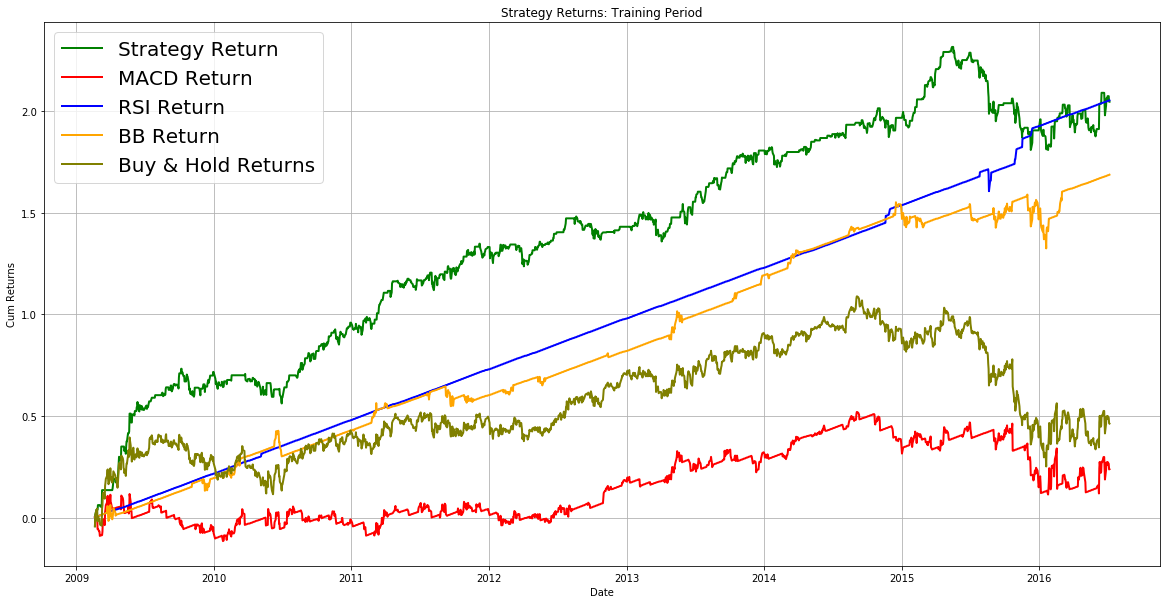

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(R1data.index, Cum_Return1, linewidth=2, color='green')
ax.plot(R1data.index, Cum_MACD1, linewidth=2, color='red')
ax.plot(R1data.index, Cum_RSI1, linewidth=2, color='blue')
ax.plot(R1data.index, Cum_BB1, linewidth=2, color='orange')
ax.plot(R1data.index, BH_Cum_Return1, linewidth=2, color='olive')

ax.set(xlabel='Date', ylabel='Cum Returns',
       title='Strategy Returns: Training Period')
ax.grid()

ax.legend(fontsize=20, loc=0)

plt.show()

# Strategy Analysis: Test Period

In [13]:
#Prepare
Tdata = df_daily[-615:]
del Tdata ['Next Week Move']

inx = Tdata[['MACD', 'ADX', 'MHIST', 'RSI', 'BB', 'FI']]
inclose = Tdata['Close']

predictions =model.predict(inx)
Tdata['Predict'] = predictions

Rdata = Tdata[['Close', 'Predict', 'MACD', 'RSI', 'BB']]
Rdata['NextClose'] = Rdata['Close'].shift(-1)
Rdata.dropna(inplace=True)

#Strategy Return
Rdata['Strategy Return'] = Rdata.apply(lambda x : np.log(x['NextClose']/x['Close']) if x['Predict'] == 1 else 0, axis=1)
Total_Return = Rdata['Strategy Return'].sum()
Cum_Return = Rdata['Strategy Return'].cumsum()
print('The Total Return for the Strategy is:', Total_Return)

#MACD
Rdata['MACD Return'] = Rdata.apply(lambda x : np.log(x['NextClose']/x['Close']) if x['MACD'] == 1 else 0, axis=1)
Total_MACD = Rdata['MACD Return'].sum()
Cum_MACD = Rdata['MACD Return'].cumsum()
print('The Total Return for the MACD Strategy is:', Total_MACD)

#RSI
Rdata['RSI Return'] = Rdata.apply(lambda x : np.log(x['NextClose']/x['Close']) if x['RSI'] == 1 else 0, axis=1)
Total_RSI = Rdata['RSI Return'].sum()
Cum_RSI = Rdata['RSI Return'].cumsum()
print('The Total Return for the RSI Strategy is:', Total_RSI)

#BB
Rdata['BB Return'] = Rdata.apply(lambda x : np.log(x['NextClose']/x['Close']) if x['BB'] == 1 else 0, axis=1)
Total_BB = Rdata['BB Return'].sum()
Cum_BB = Rdata['BB Return'].cumsum()
print('The Total Return for the BB Strategy is:', Total_BB)

#Buy and Hold Return
Rdata['Buy & Hold Returns'] = np.log(Rdata['NextClose'] /Rdata['Close'])
BH_Return = Rdata['Buy & Hold Returns'].sum()
BH_Cum_Return = Rdata['Buy & Hold Returns'].cumsum()
print('The Buy and Hold Strategy Return is:', BH_Return)


The Total Return for the Strategy is: 0.10465362694445976
The Total Return for the MACD Strategy is: -0.7781449315919851
The Total Return for the RSI Strategy is: 0.1262963310295213
The Total Return for the BB Strategy is: 0.05305131851213067
The Buy and Hold Strategy Return is: -0.4705287014552278


# Plot Strategy Returns: Test Period

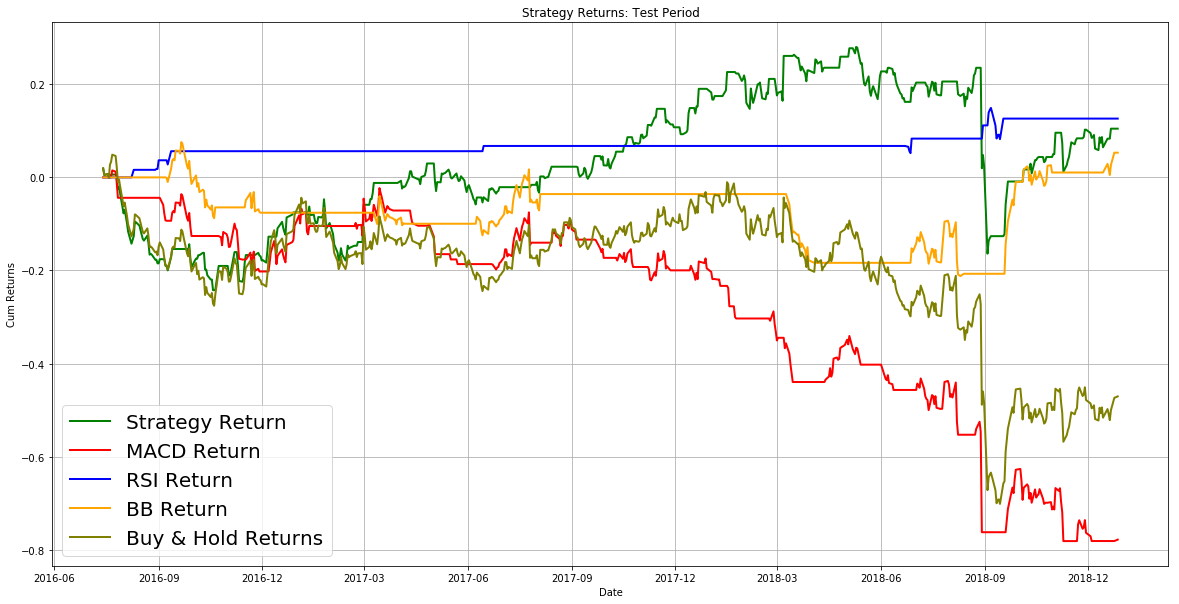

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Rdata.index, Cum_Return, linewidth=2, color='green')
ax.plot(Rdata.index, Cum_MACD, linewidth=2, color='red')
ax.plot(Rdata.index, Cum_RSI, linewidth=2, color='blue')
ax.plot(Rdata.index, Cum_BB, linewidth=2, color='orange')
ax.plot(Rdata.index, BH_Cum_Return, linewidth=2, color='olive')

ax.set(xlabel='Date', ylabel='Cum Returns',
       title='Strategy Returns: Test Period')
ax.grid()

ax.legend(fontsize=20, loc=0)

plt.show()

In [15]:
Rtdata = Rdata[['Strategy Return', 'MACD Return', 'RSI Return', 'BB Return', 'Buy & Hold Returns']]
Rtdata.to_csv('MTN_Rt_da.csv')